In [37]:
import torch

import torch.nn as nn

import torch.optim as optim

import matplotlib.pyplot as plt

In [38]:
# Dummy dataset (XOR problem)
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=torch.float32)
y = torch.tensor([[0.0], [1.0], [1.0], [0.0]], dtype=torch.float32)

# Define a simple neural network with 1 hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Function to train a model with different optimizers
def train_model(optimizer_type, lr=0.1, epochs=2000):
    model = SimpleNN()
    criterion = nn.MSELoss()
    optimizer = optimizer_type(model.parameters(), lr=lr)
    
    losses = []
    for epoch in range(epochs):
        predictions = model(X)
        loss = criterion(predictions, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return model, losses

In [39]:
# Train with SGD and Adam

sgd_model, sgd_losses = train_model(optim.SGD, lr=0.1)

adam_model, adam_losses = train_model(optim.Adam, lr=0.1)

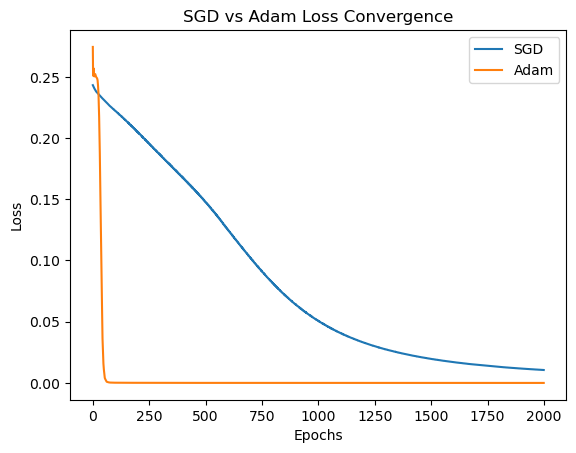

In [40]:
# Plot loss curves

plt.plot(sgd_losses, label='SGD')

plt.plot(adam_losses, label='Adam')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.title('SGD vs Adam Loss Convergence')

plt.show()